In [839]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [840]:
import os
os.chdir('/Users/theovl/Downloads')

In [841]:
df = pd.read_csv('Global+Superstore+Data.csv')

In [842]:
df.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [843]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [844]:
df['Market'].unique()

array(['US', 'APAC', 'EU', 'Africa', 'EMEA', 'LATAM', 'Canada'],
      dtype=object)

In [845]:
df['Market Segment'] = df['Market'] + ' ' + df['Segment']
df = df.drop(['Market','Segment'],axis = 1)

In [846]:
df.head(10)

,Order Date,Sales,Profit,Market Segment
0,31-07-2012,2309.650,762.1845,US Consumer
1,05-02-2013,3709.395,-288.7650,APAC Corporate
2,17-10-2013,5175.171,919.9710,APAC Consumer
3,28-01-2013,2892.510,-96.5400,EU Home Office
4,05-11-2013,2832.960,311.5200,Africa Consumer
5,28-06-2013,2862.675,763.2750,APAC Corporate
6,07-11-2011,1822.080,564.8400,APAC Consumer
7,14-04-2012,5244.840,996.4800,APAC Consumer
8,14-10-2014,5083.960,1906.4850,US Corporate
9,28-01-2012,4297.644,-1862.3124,US Consumer


In [847]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format = "%d-%m-%Y")
df['Order Date'] = df['Order Date'].apply(lambda x: x.strftime('%Y-%m'))
df = df.sort_values('Order Date')

In [848]:
import datetime

<AxesSubplot:xlabel='Profit', ylabel='Market Segment'>

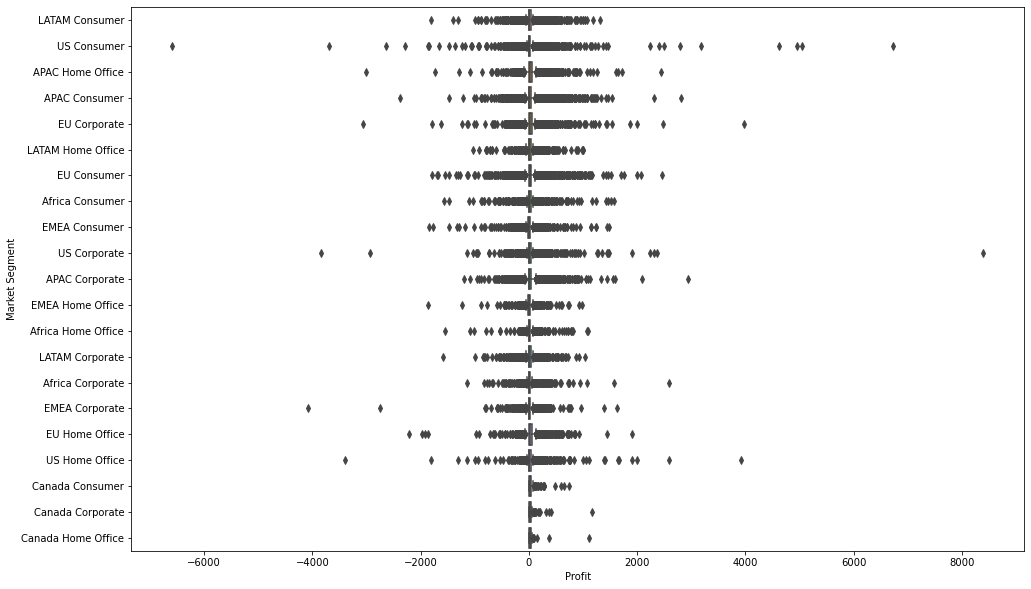

In [849]:
plt.figure(figsize=(16,10))
sns.boxplot(data = df, y = 'Market Segment', x = 'Profit')

In [850]:
d = {}
z = {}
for i in df['Market Segment'].unique():
    d[i] = df[df['Market Segment'] == i]['Profit'].mean()
    z[i] = df[df['Market Segment'] == i]['Profit'].std()
    


In [851]:
means = pd.Series(d)
means = means.to_frame().reset_index()
means = means.rename(columns = {'index' : 'Market Segment', 0 : 'Mean'})

In [852]:
Stdev = pd.Series(z)
Stdev = Stdev.to_frame().reset_index()
Stdev = Stdev.rename(columns = {'index' : 'Market Segment', 0 : 'Standard Deviation'})

In [853]:
Cov_table = pd.merge(left = means, right = Stdev, on = 'Market Segment', how='inner')

In [854]:
Cov_table['Coefficient of Variation'] = Cov_table['Standard Deviation'] / Cov_table['Mean']
Cov_table = Cov_table.sort_values('Coefficient of Variation', ascending=False).set_index('Market Segment').reset_index()

In [855]:
Cov_table

,Market Segment,Mean,Standard Deviation,Coefficient of Variation
0,EMEA Corporate,7.941000,175.006276,22.038317
1,EMEA Home Office,6.397233,139.463057,21.800527
2,EMEA Consumer,10.060116,145.279173,14.441103
3,US Consumer,25.836873,242.594020,9.389450
4,Africa Corporate,15.767504,147.175983,9.334133
5,US Corporate,30.456667,231.986266,7.616929
6,Africa Consumer,20.063880,147.489712,7.351006
7,US Home Office,33.818664,212.381482,6.280008
8,Africa Home Office,22.832849,143.027544,6.264113
9,LATAM Corporate,18.956902,109.751300,5.789517


# | Forecasting |

In [856]:
df

,Order Date,Sales,Profit,Market Segment
30643,2011-01,60.9600,28.6400,LATAM Consumer
48527,2011-01,19.3000,5.7900,US Consumer
29861,2011-01,51.6285,4.5885,APAC Home Office
29871,2011-01,47.9600,15.8000,LATAM Consumer
16508,2011-01,176.6808,-156.6792,APAC Consumer
...,...,...,...,...
40408,2014-12,53.4930,-32.1270,APAC Consumer
40403,2014-12,56.5200,23.7000,APAC Consumer
47999,2014-12,18.5280,-15.7620,EMEA Consumer
31196,2014-12,65.4000,-53.9700,EMEA Consumer


In [857]:
train = df[df['Market Segment'] == 'Canada Consumer'][['Order Date', 'Sales']]
test = df[df['Market Segment'] == 'Canada Consumer'][['Order Date', 'Sales']]

In [858]:
train.dtypes

Order Date     object
Sales         float64
dtype: object

In [859]:
train.dtypes

Order Date     object
Sales         float64
dtype: object

In [860]:
train = train.groupby('Order Date')['Sales'].sum().to_frame()
test = test.groupby('Order Date')['Sales'].sum().to_frame()

In [861]:
train

,Sales
Order Date,
2011-01,314.22
2011-02,56.91
2011-03,1405.26
2011-04,286.08
2011-05,752.01
2011-06,20.07
2011-07,127.80
2011-08,138.60
2011-09,518.28


We have some missing dates that we need to fill


In [862]:
date_range = pd.date_range('2011-01', '2014-12')

train.index = pd.DatetimeIndex(train.index)
test.index = pd.DatetimeIndex(test.index)

train = train.reindex(date_range, fill_value = 'NULL').reset_index().rename(columns= {'index':'Order Date'})
test = test.reindex(date_range, fill_value = 'NULL').reset_index().rename(columns= {'index':'Order Date'})

train['Order Date'] = pd.to_datetime(train['Order Date'], format = "%Y-%m")
train['Order Date'] = train['Order Date'].apply(lambda x: x.strftime('%Y-%m'))
test['Order Date'] = pd.to_datetime(test['Order Date'], format = "%Y-%m")
test['Order Date'] = test['Order Date'].apply(lambda x: x.strftime('%Y-%m'))

train.Sales = pd.to_numeric(train.Sales, errors='coerce').astype('float64')
test.Sales = pd.to_numeric(test.Sales, errors='coerce').astype('float64')

train = train.groupby('Order Date')['Sales'].sum().to_frame()
test = test.groupby('Order Date')['Sales'].sum().to_frame()

t_len = 42
df = train.copy()
train = train.iloc[:t_len]
test = test.iloc[t_len:]


In [863]:
df

,Sales
Order Date,
2011-01,314.22
2011-02,56.91
2011-03,1405.26
2011-04,286.08
2011-05,752.01
2011-06,20.07
2011-07,127.80
2011-08,138.60
2011-09,518.28


In [864]:
df.dtypes

Sales    float64
dtype: object

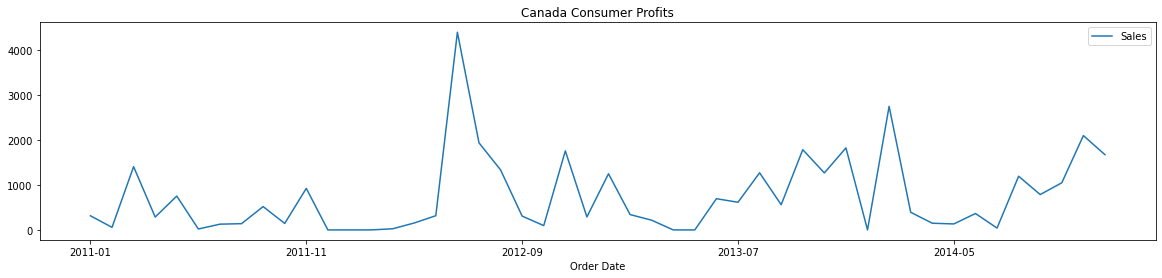

In [865]:
df.plot(figsize=(20, 4))
plt.legend(loc='best')
plt.title('Canada Consumer Profits')
plt.show(block=False)

We need to replace the missing values on our table

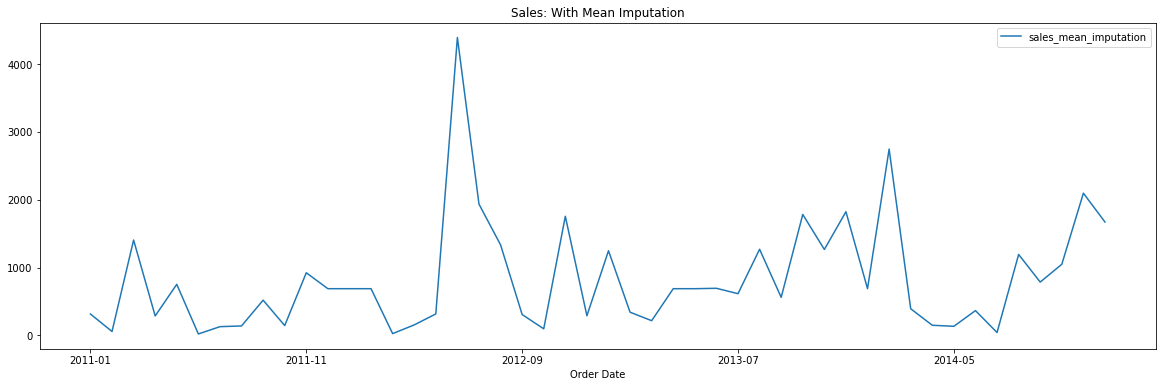

In [866]:
train = train.assign(sales_mean_imputation = train.Sales.replace(0,train.Sales.mean()))
df = df.assign(sales_mean_imputation = df.Sales.replace(0,train.Sales.mean()))
df[['sales_mean_imputation']].plot(figsize=(20, 6))
plt.legend(loc='best')
plt.title('Sales: With Mean Imputation')
plt.show(block=False)

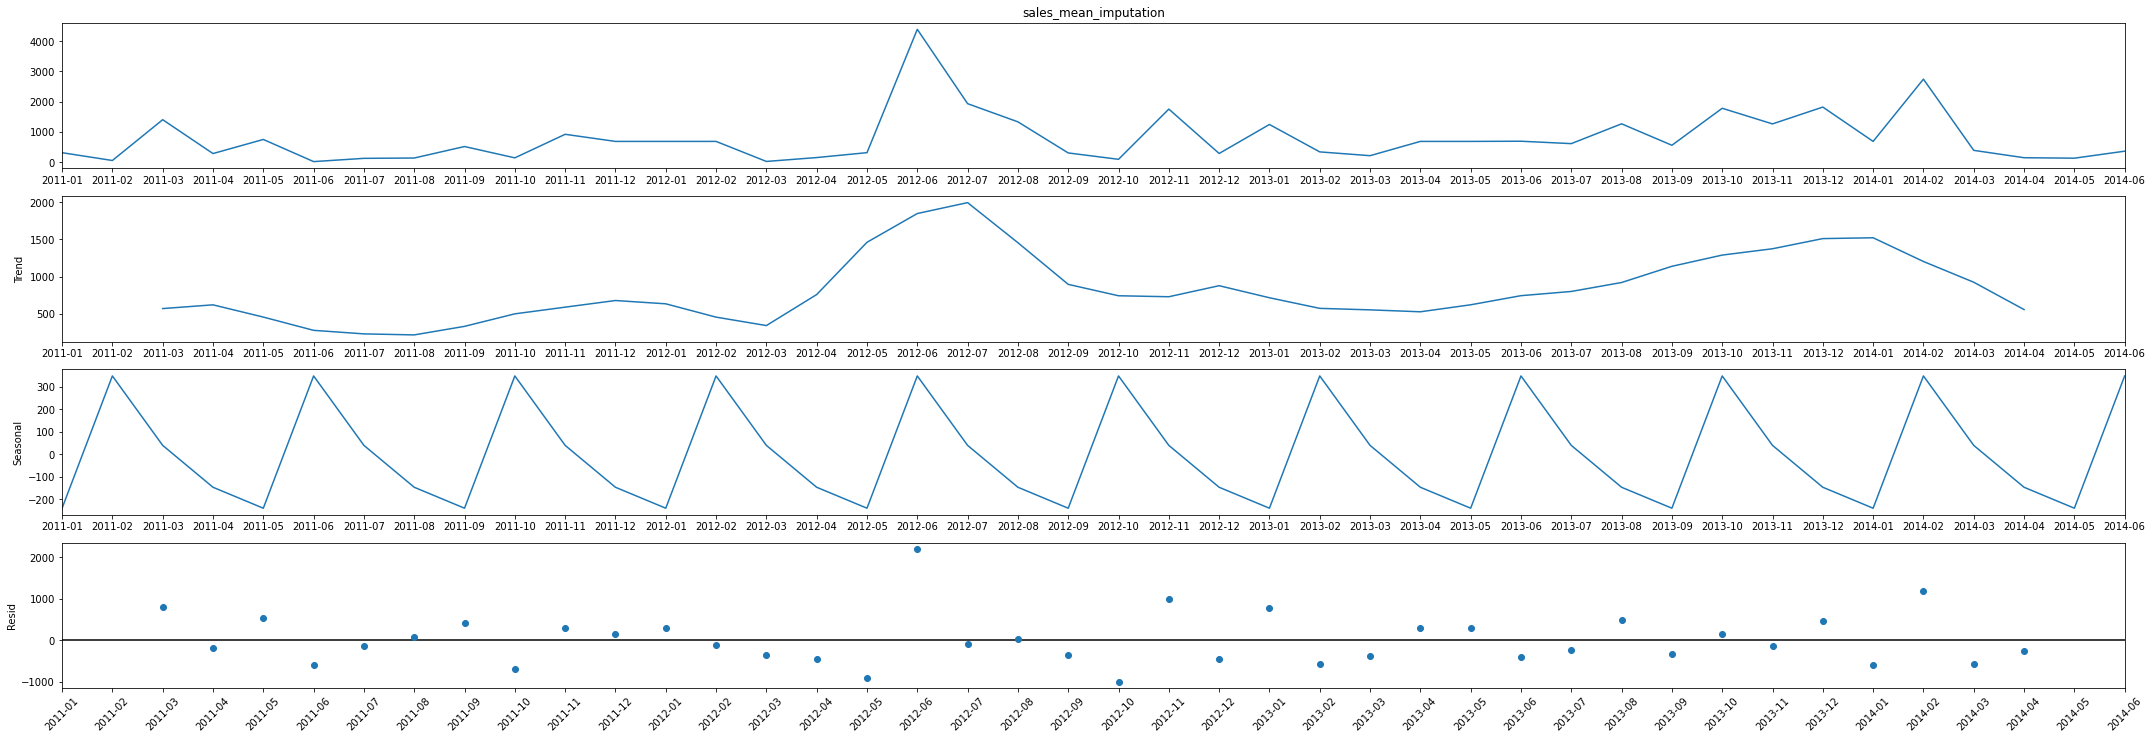

In [867]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 30, 10
decomposition = sm.tsa.seasonal_decompose(train['sales_mean_imputation'], model='additive',period=4) # additive seasonal index
fig = decomposition.plot()
plt.xticks(rotation =45)
plt.show()

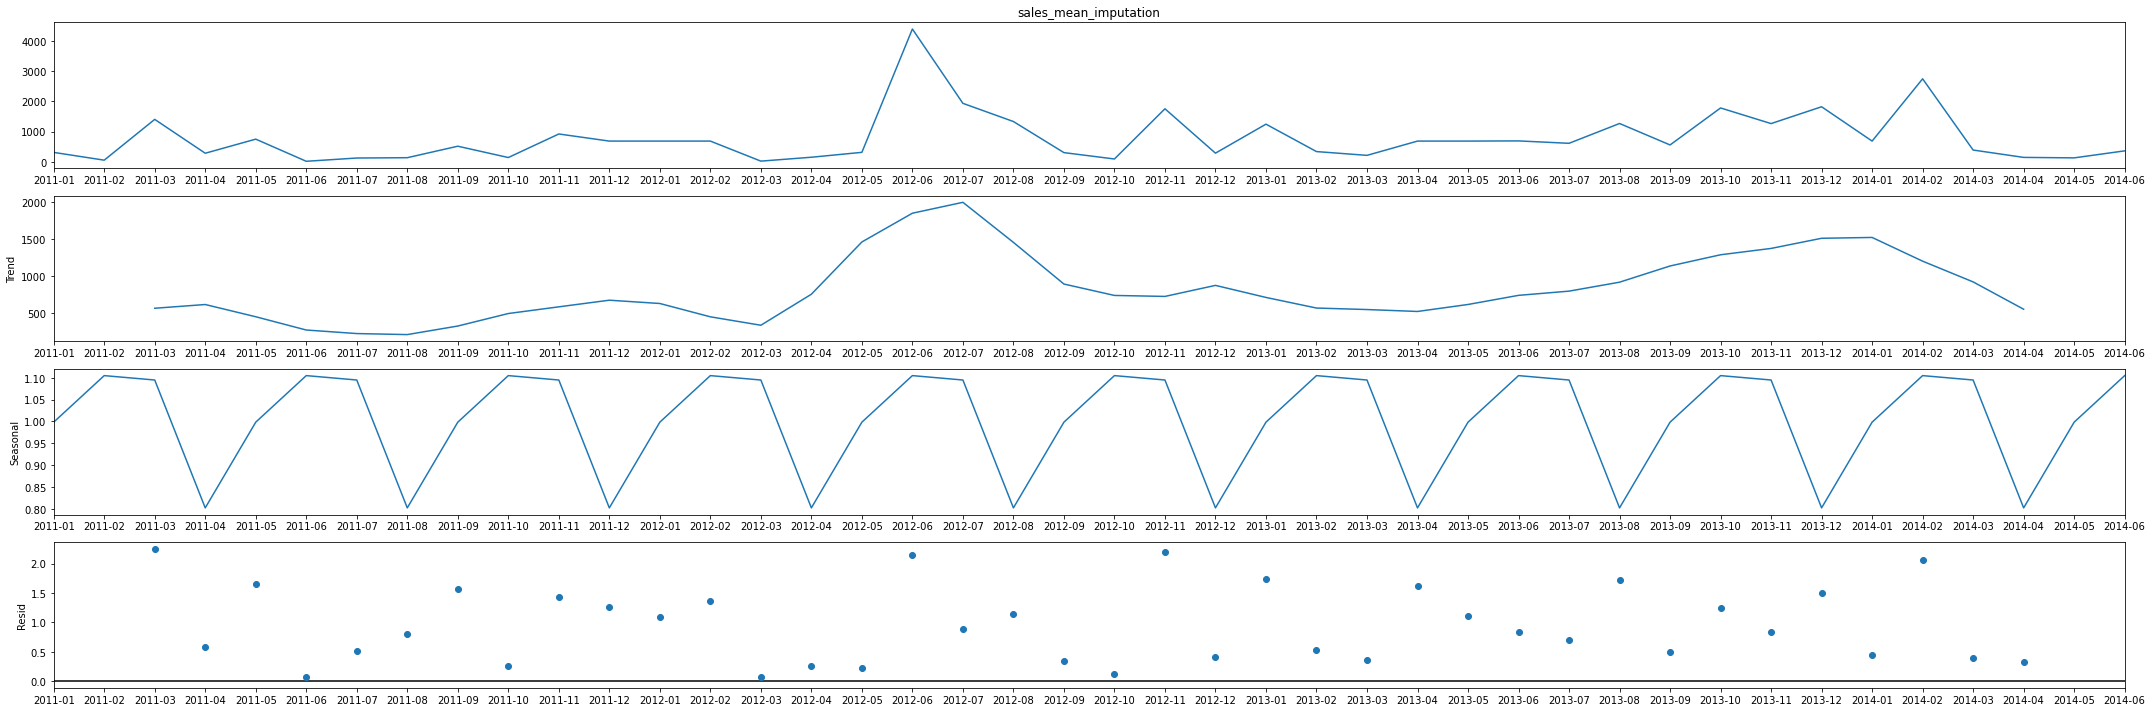

In [868]:
decomposition = sm.tsa.seasonal_decompose(train['sales_mean_imputation'], model='multiplicative', period=4) # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

In [869]:
train.head(14)

,Sales,sales_mean_imputation
Order Date,,
2011-01,314.22,314.220000
2011-02,56.91,56.910000
2011-03,1405.26,1405.260000
2011-04,286.08,286.080000
2011-05,752.01,752.010000
2011-06,20.07,20.070000
2011-07,127.80,127.800000
2011-08,138.60,138.600000
2011-09,518.28,518.280000


In [870]:
test

,Sales
Order Date,
2014-07,41.40
2014-08,1192.59
2014-09,785.40
2014-10,1047.63
2014-11,2095.80
2014-12,1671.09


#### Simple Average Method

In [871]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['sales_mean_imputation'].mean()
print(y_hat_avg['avg_forecast'])

Order Date
2014-07    785.991837
2014-08    785.991837
2014-09    785.991837
2014-10    785.991837
2014-11    785.991837
2014-12    785.991837
Name: avg_forecast, dtype: float64


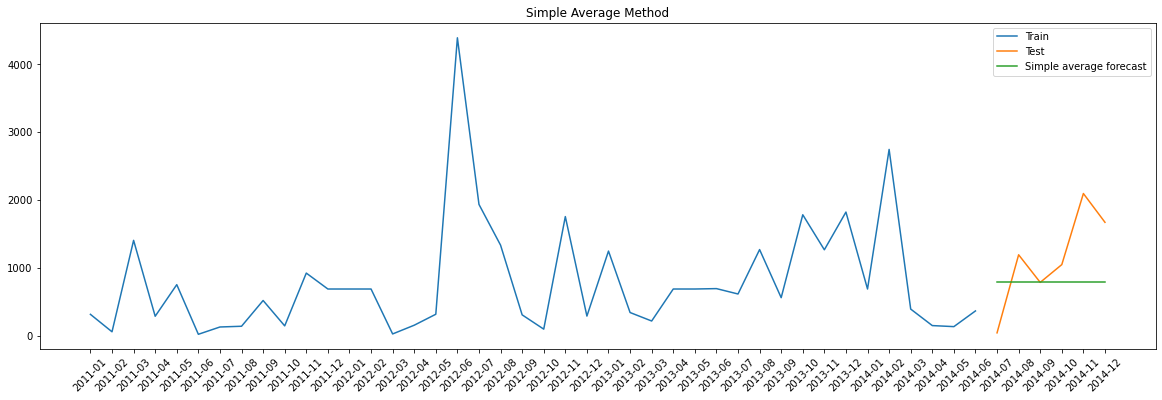

In [872]:
plt.figure(figsize=(20,6))
plt.xticks(rotation = 45)
plt.plot(train['sales_mean_imputation'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [873]:
from sklearn.metrics import mean_squared_error

In [874]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['avg_forecast'])/test['Sales'])*100,2)

Results = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })

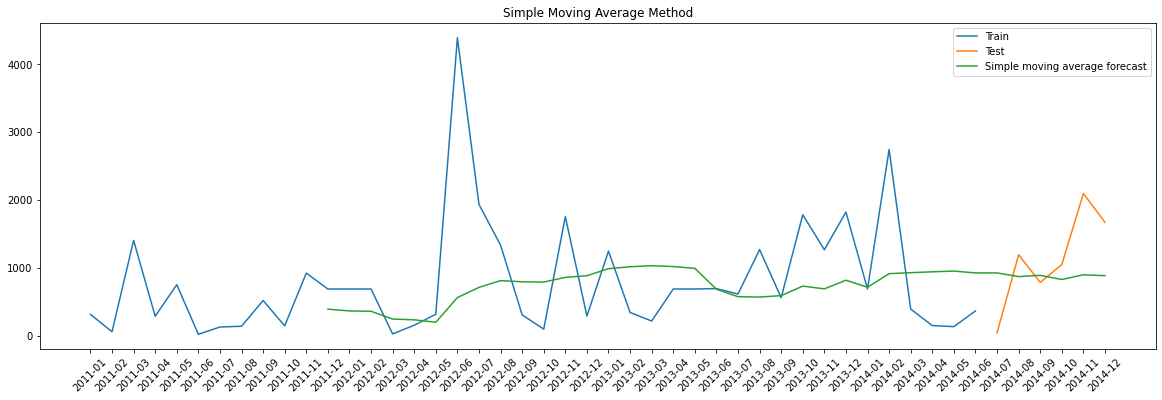

In [875]:
y_hat_sma = df.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = df['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][42] = y_hat_sma['sma_forecast'][t_len-1]

plt.figure(figsize=(20,6))
plt.xticks(rotation = 45)
plt.plot(train['sales_mean_imputation'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [876]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sma['sma_forecast'][t_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][t_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([Results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple average method,740.18,328.86
0,Simple moving average forecast,706.80,383.24


#### Holt Winter's Additive Method w/ Seasonalitty

Here we will try with varying levels of seasonality because we seem to see a trend every 12 months

In [877]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [878]:
y_hat_hwa_3m = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=3 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa_3m['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.21692583667389373, 'smoothing_trend': 9.983404033766308e-05, 'smoothing_seasonal': 0.0008831240924694989, 'damping_trend': nan, 'initial_level': 605.9005393424338, 'initial_trend': 2.3269572522151876, 'initial_seasons': array([-207.06011257,   73.41692148,  133.69774626]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [879]:
y_hat_hwa_12m = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa_12m['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.1143265646320378, 'smoothing_trend': 0.08867364568724724, 'smoothing_seasonal': 0.003576846834656557, 'damping_trend': nan, 'initial_level': 151.42185751029012, 'initial_trend': 6.087100639478745, 'initial_seasons': array([  32.43403684, -408.37172066, -494.30827765, -588.94192496,
       -544.3248145 , 1727.28844075,  423.37383635,  116.08493877,
       -195.43249305, -438.63103721,  777.4295534 , -392.88087906]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/theovl/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


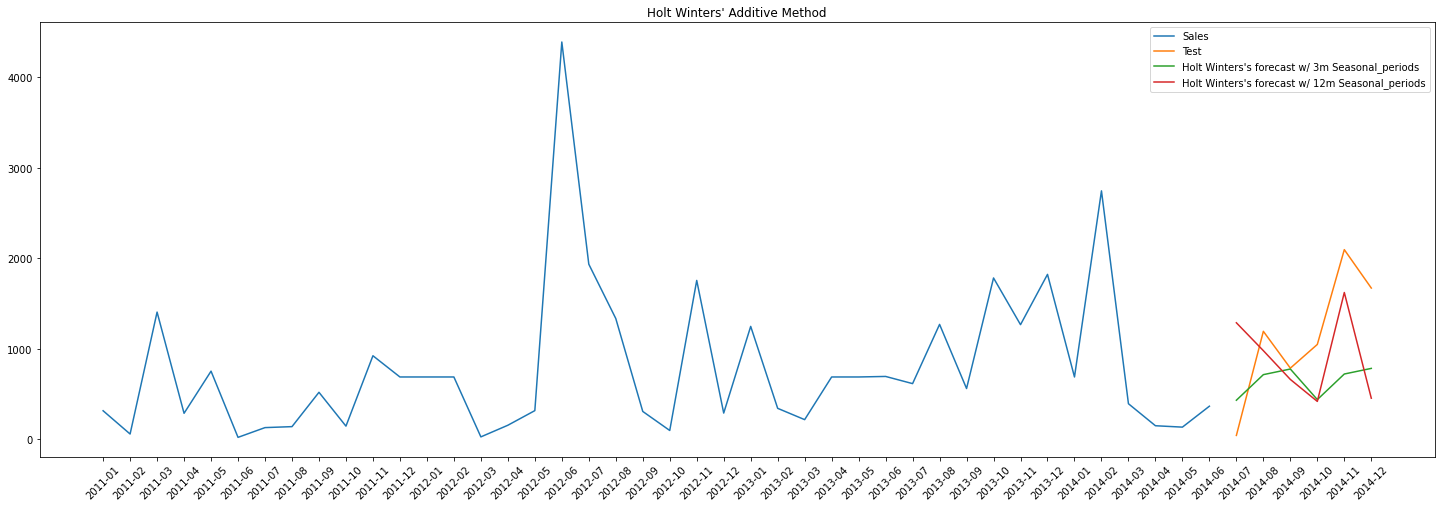

In [880]:
plt.figure(figsize=(25,8))
plt.plot( train['sales_mean_imputation'], label='Sales')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa_3m['hw_forecast'], label="Holt Winters's forecast w/ 3m Seasonal_periods")
plt.plot(y_hat_hwa_12m['hw_forecast'], label="Holt Winters's forecast w/ 12m Seasonal_periods")
plt.legend(loc='best')
plt.xticks(rotation = 45)
plt.title("Holt Winters' Additive Method")
plt.show()

In [881]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa_3m['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa_3m['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method w/ 3 month period'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa_12m['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa_12m['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method w/ 12 month period'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]

results

,Method,RMSE,MAPE
0,Simple average method,740.18,328.86
0,Simple moving average forecast,706.80,383.24
0,Holt Winters' additive method w/ 3 month period,756.52,193.07
0,Holt Winters' additive method w/ 12 month period,787.29,533.09


#### Holt Winter's Multiplicative Method

In [882]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['sales_mean_imputation']) ,seasonal_periods=12,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.07571428571428572, 'smoothing_trend': 0.07571428571428572, 'smoothing_seasonal': 0.13693121693121693, 'damping_trend': nan, 'initial_level': 265.6848373015872, 'initial_trend': 69.39677200577202, 'initial_seasons': array([1.34538267, 0.6567355 , 0.17942737, 0.55754775, 0.61256864,
       2.72996629, 1.15562892, 0.83562082, 0.74173176, 0.23523149,
       2.12461313, 0.82554564]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Users/theovl/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


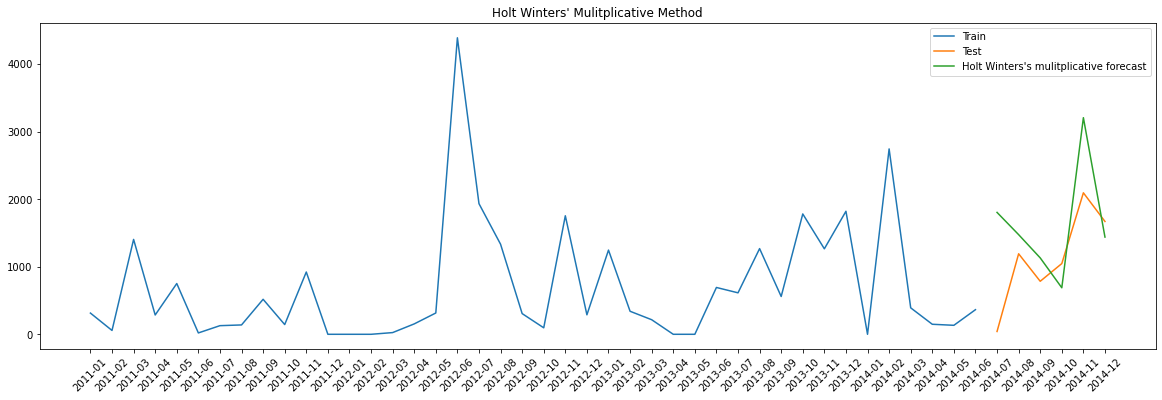

In [883]:
plt.figure(figsize=(20,6))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label= "Holt Winters's mulitplicative forecast")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.title("Holt Winters' Mulitplicative Method")
plt.show()

#### ARIMA forecasting

In [908]:
from statsmodels.tsa.arima.model import ARIMA

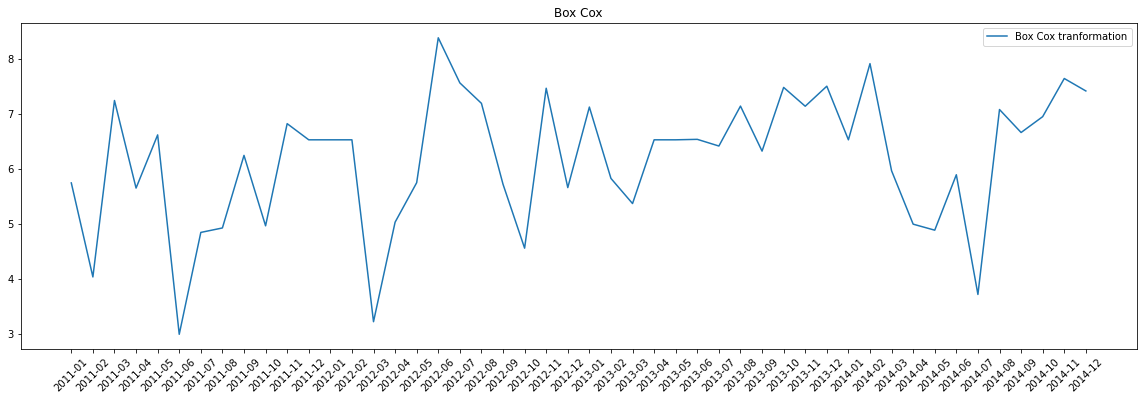

In [909]:
from scipy.stats import boxcox
df_boxcox = pd.Series(boxcox(df['sales_mean_imputation'], lmbda=0), index = df.index)

plt.figure(figsize=(20,6))
plt.xticks(rotation = 45)
plt.plot(df_boxcox, label='Box Cox tranformation')
plt.legend(loc='best')
plt.title('Box Cox')
plt.show()

##### Removing the trend to observe noise

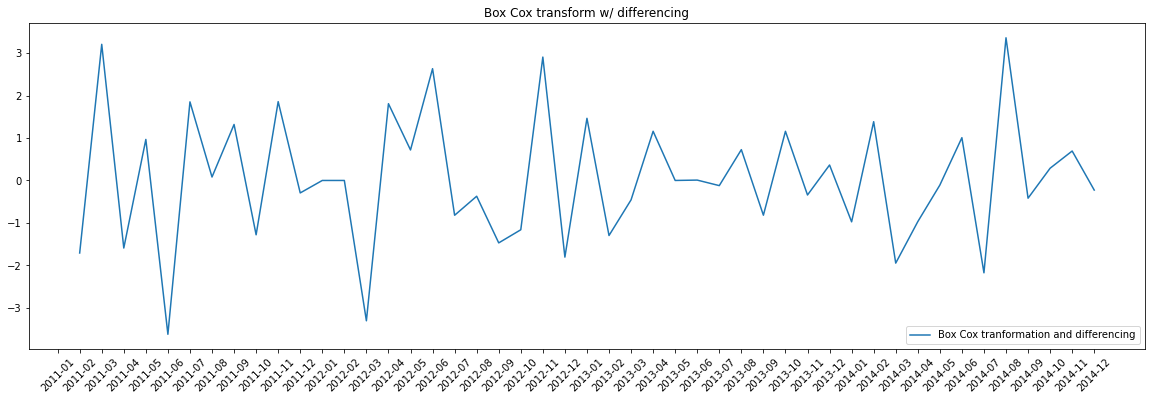

In [931]:

df_boxcox_diff = pd.Series(df_boxcox - df_boxcox.shift(), df.index)
plt.figure(figsize=(20,6))
plt.xticks(rotation =45)
plt.plot(df_boxcox_diff, label='Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('Box Cox transform w/ differencing')
plt.show()

In [932]:
df_boxcox_diff = df_boxcox_diff.to_frame().rename(columns = {0 : 'Sales Adjusted boxcox w/ differencing'})
df_boxcox_diff

,Sales Adjusted boxcox w/ differencing
Order Date,
2011-01,NaN
2011-02,-1.708622
2011-03,3.206507
2011-04,-1.591706
2011-05,0.966478
2011-06,-3.623523
2011-07,1.851240
2011-08,0.081126
2011-09,1.318924


In [933]:
df_boxcox_diff = df_boxcox_diff.dropna() #getting rid of the null value

In [934]:
train_boxcox = df_boxcox[:t_len]
test_boxcox = df_boxcox[t_len:]
train_boxcox_diff = df_boxcox_diff[:t_len-1]
test_boxcox_diff = df_boxcox_diff[t_len-1:]

In [935]:
model = ARIMA(train_boxcox_diff, order=(12, 1, 5))
model_fit = model.fit()
print(model_fit.params)

/Users/theovl/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/theovl/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/theovl/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/theovl/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/theovl/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statesp

ar.L1    -1.310993
ar.L2    -1.174363
ar.L3    -1.893946
ar.L4    -2.722194
ar.L5    -2.234326
ar.L6    -1.915371
ar.L7    -2.124411
ar.L8    -2.104006
ar.L9    -1.285898
ar.L10   -0.750590
ar.L11   -0.827334
ar.L12   -0.640341
ma.L1    -0.298427
ma.L2    -0.164233
ma.L3     0.096890
ma.L4     0.265695
ma.L5    -0.898118
sigma2    0.560343
dtype: float64


/Users/theovl/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [936]:
y_hat_arima = df_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(df_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

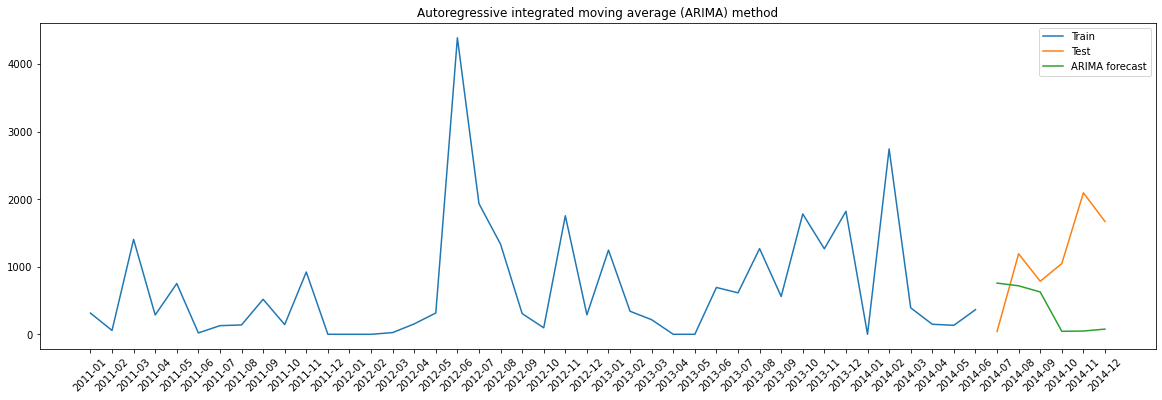

In [942]:
plt.figure(figsize=(20,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.xticks(rotation = 45)
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [943]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)


tempResults = pd.DataFrame({'Method':['autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple average method,740.18,328.86
0,Simple moving average forecast,706.80,383.24
0,Holt Winters' additive method w/ 3 month period,756.52,193.07
0,Holt Winters' additive method w/ 12 month period,787.29,533.09
0,autoregressive integrated moving average (ARIM...,1190.54,346.78


In [938]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_boxcox, order=(2, 1, 4), seasonal_order=(2, 1, 4, 12)) 
model_fit = model.fit()
print(model_fit.params)

/Users/theovl/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/theovl/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/theovl/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53878D+00    |proj g|=  6.65277D-01

At iterate    5    f=  1.21337D+00    |proj g|=  1.52012D-01

At iterate   10    f=  1.16675D+00    |proj g|=  4.07446D-02

At iterate   15    f=  1.15168D+00    |proj g|=  1.18369D-02

At iterate   20    f=  1.14130D+00    |proj g|=  3.30705D-02

At iterate   25    f=  1.13586D+00    |proj g|=  3.97322D-02

At iterate   30    f=  1.13351D+00    |proj g|=  1.49828D-02

At iterate   35    f=  1.13183D+00    |proj g|=  1.89400D-02

At iterate   40    f=  1.13172D+00    |proj g|=  1.51009D-03

At iterate   45    f=  1.13171D+00    |proj g|=  1.23804D-03


/Users/theovl/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.13168D+00    |proj g|=  1.34257D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     52      1     0     0   1.343D-03   1.132D+00
  F =   1.1316788242982891     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
ar.L1      -1.056039
ar.L2      -0.085188
ma.L1       0.608988
ma.L2       0.038072
ma.L3      -0.850068
ma.L4      -0.796806
ar.S.L12   -0.823460
ar.S.L24   -0.208153
ma.S.L12   -0.647642
ma.S.L24    0.026807
ma.S.L36    0.259374
ma.S.L48    0.221229
sigma2      0.470352
dtype: float64


In [939]:
y_hat_sarima = df_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

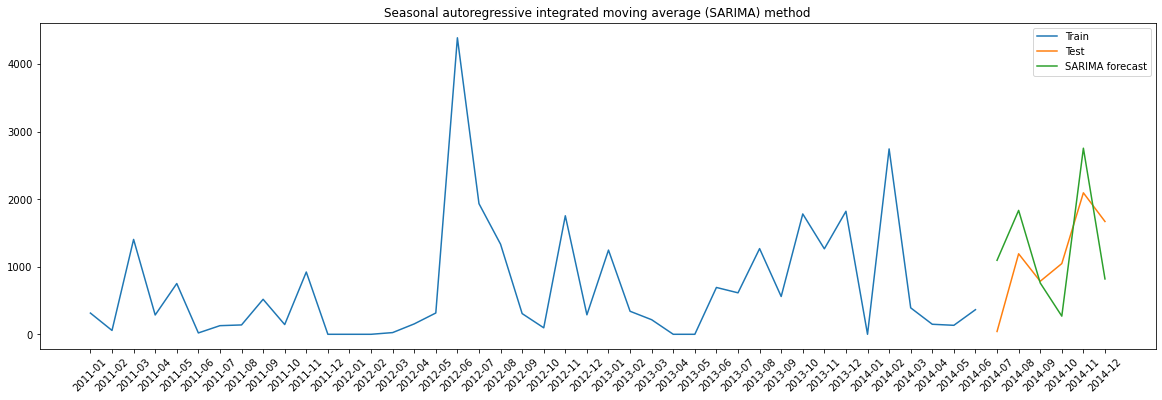

In [941]:
plt.figure(figsize=(20,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.xticks(rotation = 45)
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [944]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)


tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple average method,740.18,328.86
0,Simple moving average forecast,706.80,383.24
0,Holt Winters' additive method w/ 3 month period,756.52,193.07
0,Holt Winters' additive method w/ 12 month period,787.29,533.09
0,autoregressive integrated moving average (ARIM...,1190.54,346.78
0,Seasonal autoregressive integrated moving aver...,740.86,460.17
